In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

Activities = [1,2,3,4,5,6,7,8,9,10,11]

Using TensorFlow backend.


In [2]:
#preparing the data : Given a file, the function prepares 2 arrays
"""
feature_set : each element is an array of 50 readings
targets : each element is a label corrisponding to the readings with the same index in feature_set
"""
def getSamplesFromFiles(filesNames=["mHealth_ECGProcessed_subject3.log"],readingsPerSample=50):
    targets  = np.array([])
    feature_set= np.array([])
    for fileName in filesNames:
        df = pd.read_csv(fileName, header=None, delim_whitespace=True)
        for i in range(int(df.shape[0]/readingsPerSample)):
            if df[2][i*readingsPerSample:i*readingsPerSample+readingsPerSample].mean() in Activities:
                feature_set=np.append(feature_set,[df[1][i*readingsPerSample:i*readingsPerSample+readingsPerSample]])
                targets=np.append(targets,df[2][i*readingsPerSample:i*readingsPerSample+readingsPerSample].mean()-1)

    feature_set=feature_set.reshape(int(feature_set.shape[0]/readingsPerSample),readingsPerSample)
#     one_hot_labels=one_hot_labels.reshape(int(one_hot_labels.shape[0]/12),12)
    return feature_set, targets
def unison_shuffled_copies(a, b,seed=1):
    assert len(a) == len(b)
    np.random.seed(seed)
    p = np.random.permutation(len(a))
    return a[p], b[p]

(332, 100)
{0.0: 30, 1.0: 30, 2.0: 30, 3.0: 29, 4.0: 29, 5.0: 32, 6.0: 32, 7.0: 31, 8.0: 30, 9.0: 30, 10.0: 29}


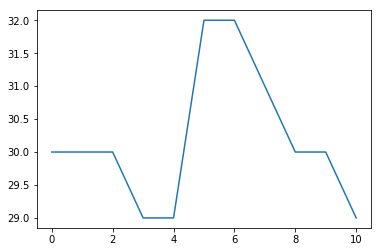

In [10]:
feature_set,targets=getSamplesFromFiles(["mHealth_ECGProcessed_subject3.log"],100)
X,Y=unison_shuffled_copies(feature_set,targets)
print(X.shape)
# validation_targets.shape
unique, counts = np.unique(Y, return_counts=True)
print(dict(zip(unique, counts)))
# plt.axis([0, 10, 100, 200])
plt.plot(unique, counts)
# X_train, X_test, y_train, y_test = train_test_split(feature_set, targets, test_size=0.33, random_state=10)
# feature_set, validation_feature_set, targets, validation_targets = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [11]:
# encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(Y)
# encoded_Y = encoder.transform(Y)
# # convert integers to dummy variables (i.e. one hot encoded)
# dummy_y = np_utils.to_categorical(Y)
dummy_y = Y

In [12]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(100, input_dim=100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(11, activation='softmax'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [16]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=2, verbose=0)

In [18]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [19]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 22.57% (5.27%)
